# EDA

### Import Data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Importing Data

sales = pd.read_csv(r"C:\Users\AS\Downloads\k_circle_sales.csv")
sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier 2   
3                       1998         NaN                  NaN   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Profit  
0  Supermarket Type1          3735.1380    11.5  
1  Supermarket Type2           443.4228    14.3  
2  Supermarket Type1          2097.2700    14.5  
3      Grocery Store           732.3800    13.6  
4  Supermarket Type1           994.7052    14.1

In [104]:
# Knowing about data

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [105]:
# Five - Point Summary

sales.describe().T

count         mean          std      min  \
Item_Weight                7774.0    11.676740     5.776851     0.00   
Item_Visibility            8523.0     0.066132     0.051598     0.00   
Item_MRP                   8523.0   140.998838    62.258099    31.30   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.00   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.29   
Profit                     8523.0    13.414514     1.701840     0.10   

                                   25%          50%          75%           max  
Item_Weight                   7.720000    11.800000    16.500000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.800000   142.700000   185.650000    266.900000  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800  
Profit                       13.150000    13.900000    14.300000     24.000000

In [106]:
# Separating numerical columns

num_cols = sales.select_dtypes(include=np.number).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [107]:
# Separating Categorical Columns 

cat_cols = sales.select_dtypes(include="object").columns
print(cat_cols)
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

##### Findings
* Imported essential libraries which are required for EDA.
* Reading the CSV file.
* Used head() to get the overview of data.
    - as we can see the data is of sales having both **numeric** and **categorical columns**.
* Used info() to get to know about missing values, null values and data type of column.
    - Here **Item_Weight, Outlet_Size** and **Outlet_Location_Type** have *missing values* .
* Used describe() to get five point summary of data.
    - Here we can see **data** may have *potential outliers*.
* Segregating data on the basis of **numeric** and **category** for easier analysis.
* Here, the target variable is **Item Outlet Sales**.

### Univariate Analysis

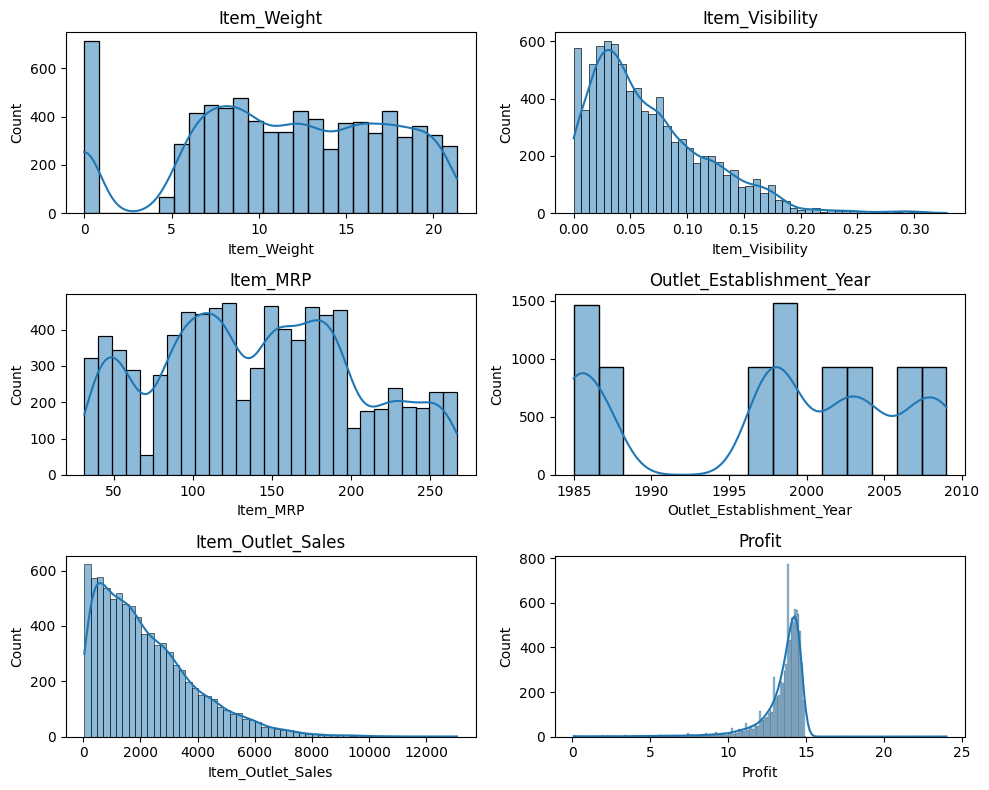

In [108]:
# Plotting Numerical Columns

plt.figure(figsize=(10,8))

c = 1
for i in num_cols:
    plt.subplot(3,2,c)
    sns.histplot(x = sales[i], data=sales, kde= True)
    c += 1
    plt.title(i)
plt.tight_layout()
plt.show()

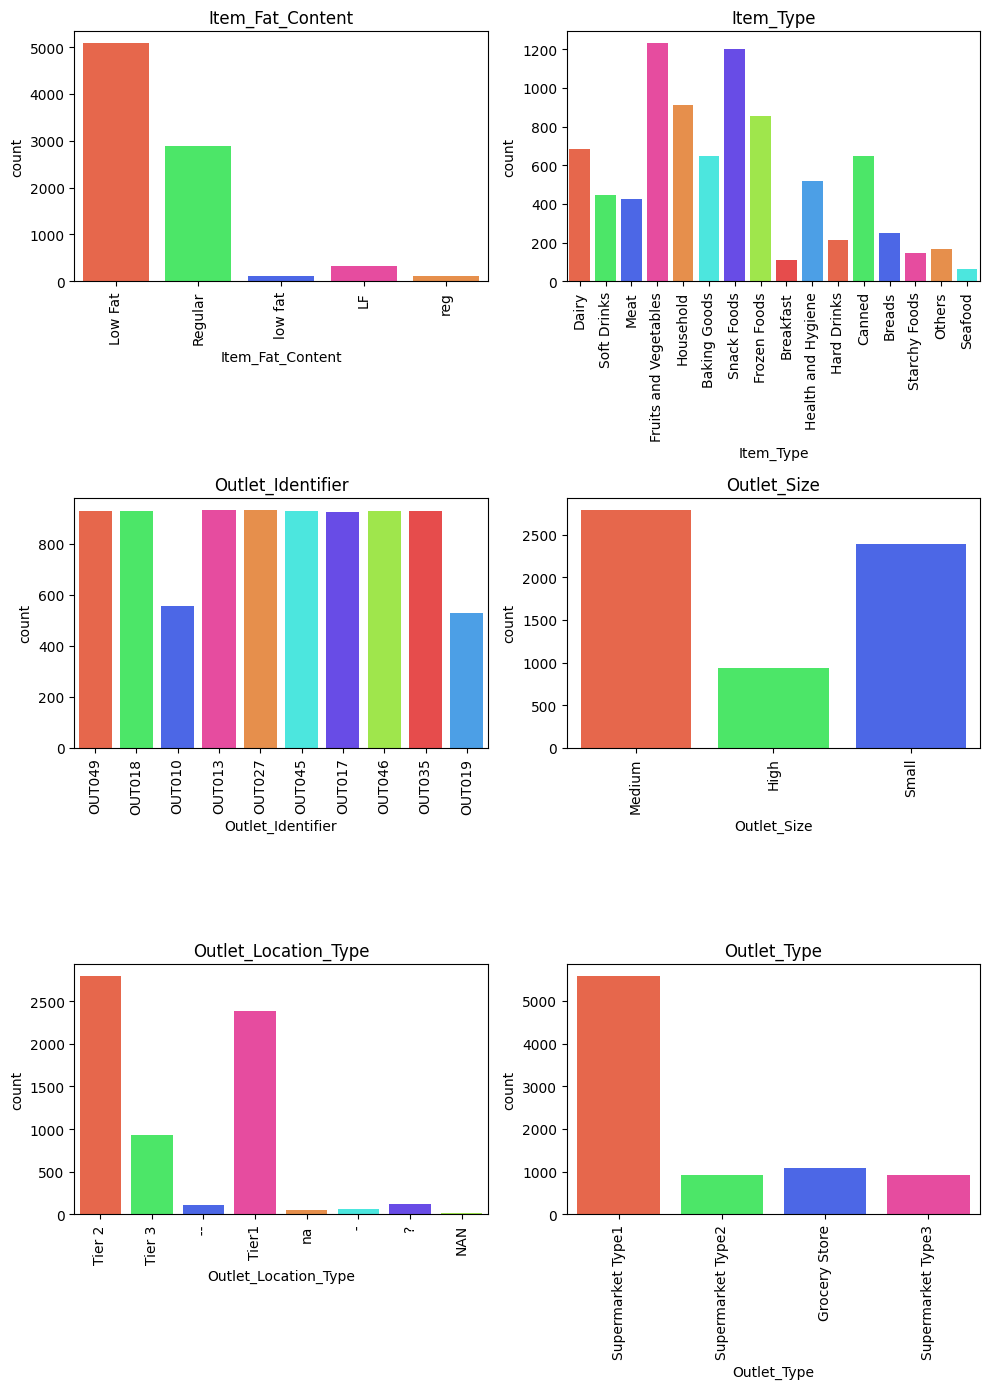

In [109]:
# Plotting Categorical Columns

plt.figure(figsize=(10,14))

c = 1
for i in cat_cols:
    plt.subplot(3,2,c)
    sns.countplot(x = sales[i], data = sales, palette=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', 
                                                       '#FF8C33', '#33FFF5', '#5733FF', '#A1FF33', '#FF3333', '#33A1FF'])
    c += 1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Findings
* Plotting numeric columns to check their shape, skewness and other errors using histogram (kde).
    - We can see **Item Weight** have *Incorrect Values* (Yet to confirm).
    - **Item Visibility, Item Outlet Sales** and **Profit** seemed to be *skewed* and *shape* is also *not normal*.
* Plotting categorical columns to check the frequency and irregularities in categories using countplot.
    - **Item Fat Content** and **Outlet Location Type** have *irregular Categories*.

### Bivariate Analysis

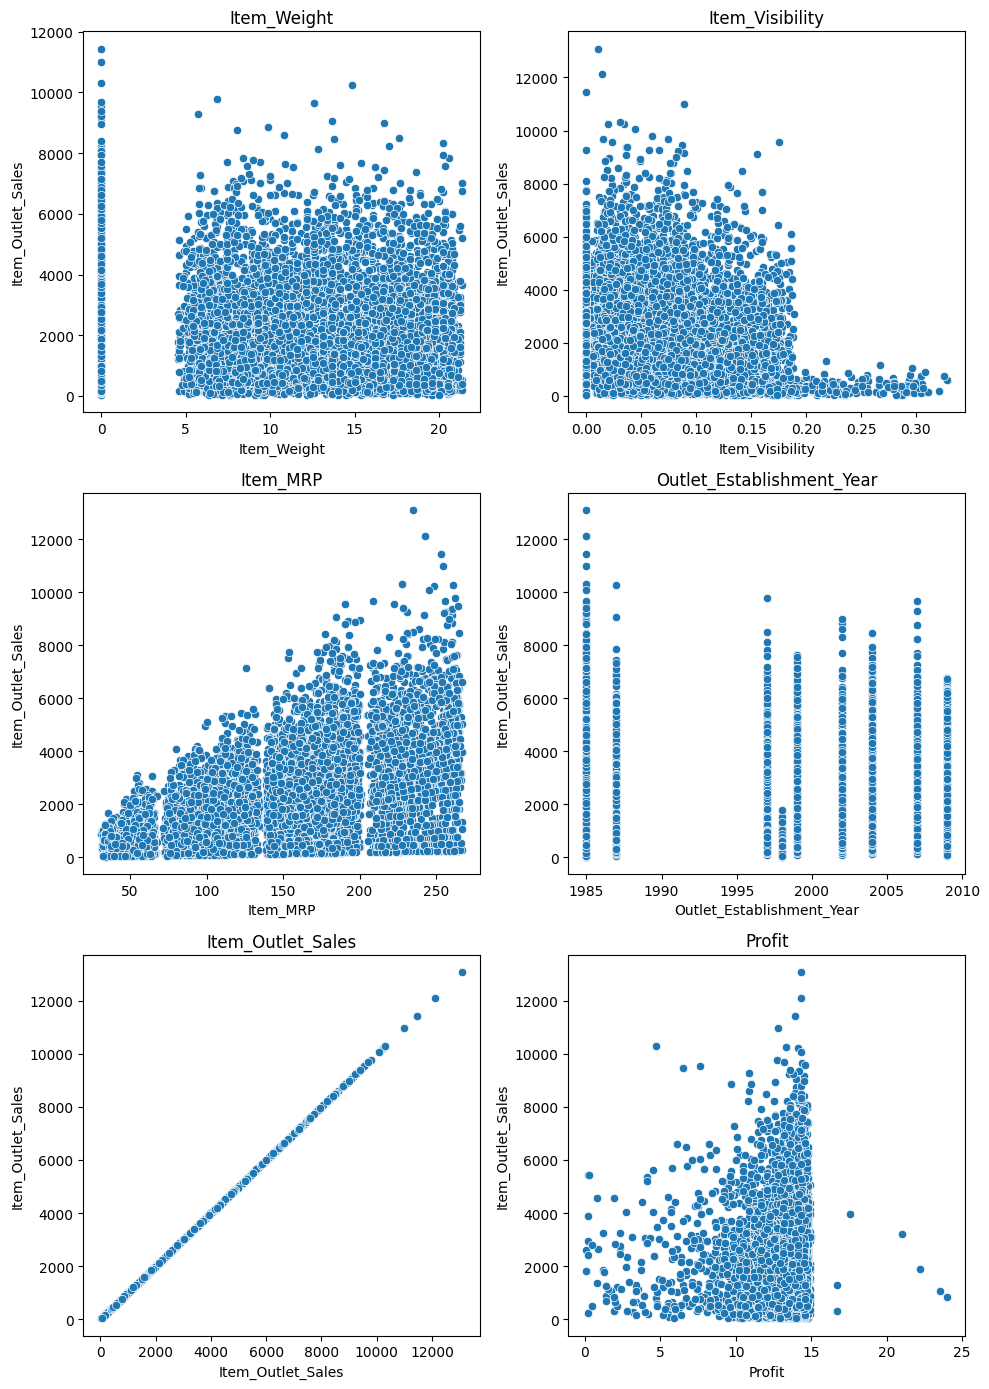

In [110]:
# Numerical vs Numerical

plt.figure(figsize=(10,14))

c = 1
for i in num_cols:
    plt.subplot(3,2,c)
    sns.scatterplot(x = sales[i], y = "Item_Outlet_Sales", data = sales)
    c += 1
    plt.title(i)
plt.tight_layout()
plt.show()

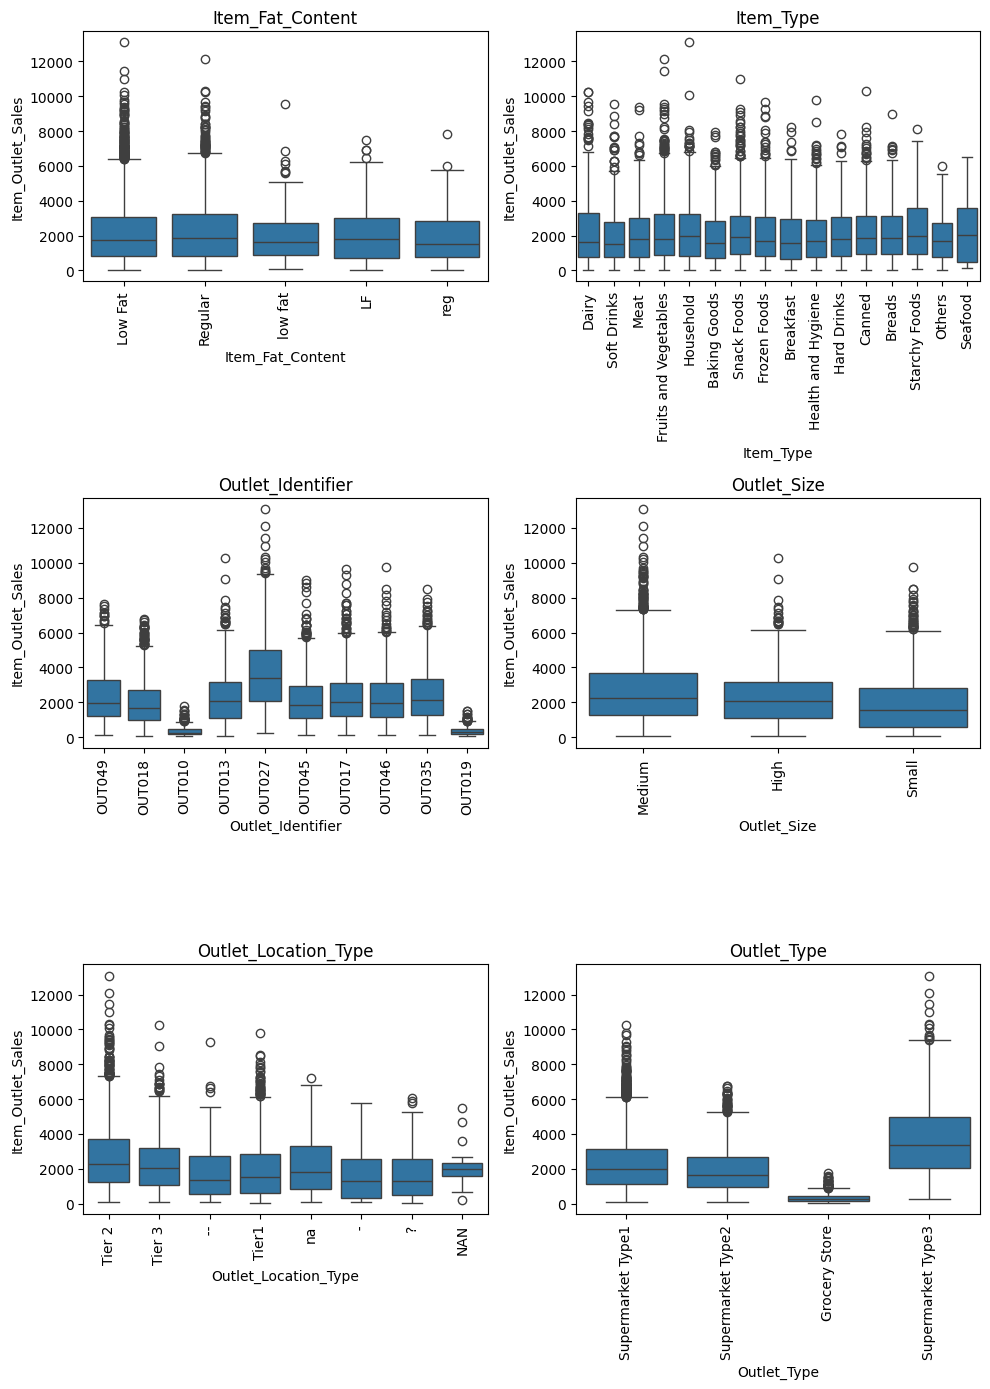

In [111]:
# Category vs Numerical

plt.figure(figsize=(10,14))

c = 1
for i in cat_cols:
    plt.subplot(3,2,c)
    sns.boxplot(x = sales[i], y = "Item_Outlet_Sales", data=sales)
    c +=1
    plt.title(i)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [112]:
sales[num_cols].skew()  # Skewness

Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

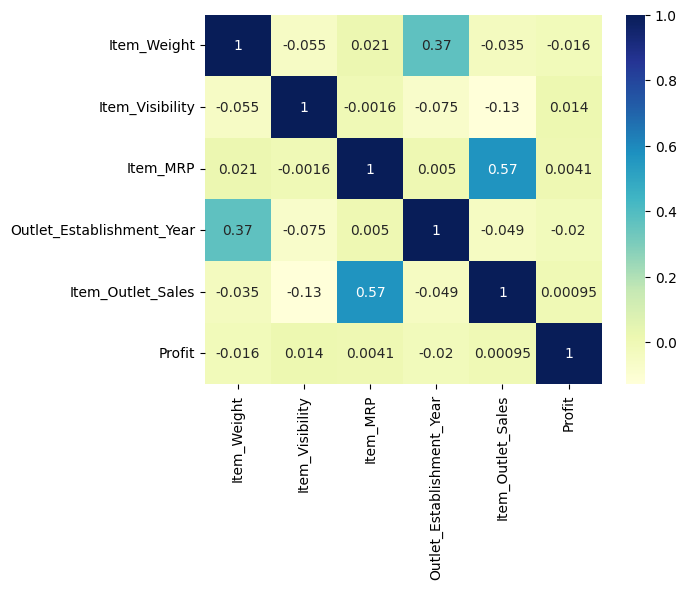

In [113]:
sns.heatmap(sales[num_cols].corr(), annot = True, cmap = "YlGnBu") # co-relation
plt.show()

##### Findings
* Plotting both numerical and categorical columns against target variable to find Irregularities.
    - Confirmed that **Item Weight** have some items with *Zero weight* and also detect some *outliers*.
    - Categorical columns required some *feature engineering* and also deteched the outliers.
* Also checked the skewness.
    - **Item_Visibility** and **Item_Outlet_Sales** are *Rightly Skewed*.
    - **Profit** is *Left Skewed*.
* There is minimal coorelation between all the columns.


### Missing Values Treatment

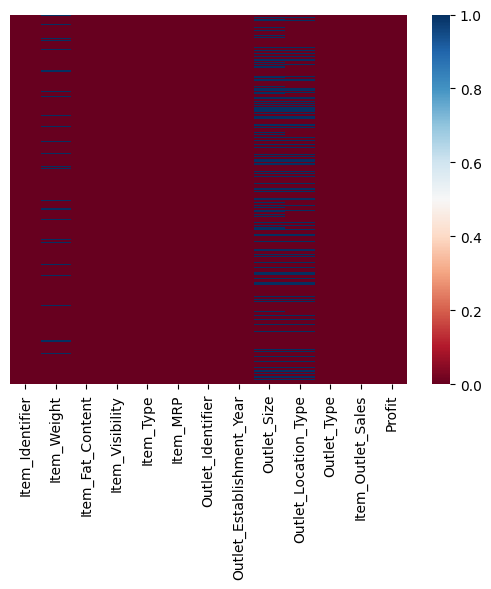

In [114]:
# Visualizing Null Values

sns.heatmap(sales.isnull(), yticklabels=False, annot = False, cmap="RdBu")
plt.show()

In [115]:
# Number of Null Values

sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [116]:
# Percentage of Null Values

sales.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [117]:
# filling Null Values in Item Weight

val1 = sales.groupby("Item_Identifier")["Item_Weight"].transform(lambda x : x.fillna(x.mean()))
sales["Item_Weight"] = val1
sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier 2   
3                       1998         NaN                  NaN   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Profit  
0  Supermarket Type1          3735.1380    11.5  
1  Supermarket Type2           443.4228    14.3  
2  Supermarket Type1          2097.2700    14.5  
3      Grocery Store           732.3800    13.6  
4  Supermarket Type1           994.7052    14.1

In [118]:
# Rechecking

sales[sales["Item_Weight"].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1922           FDK57          NaN          Low Fat         0.079904   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
1922   Snack Foods     120.0            OUT027                       1985   
5022  Baking Goods     121.2            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
1922      Medium               Tier 2  Supermarket Type3          4434.2280   
5022       Small                Tier1      Grocery Store           120.5098   

      Profit  
1922    14.5  
5022    12.3

In [119]:
# Filling the left values

In [120]:
val2 = sales.loc[(sales["Item_Fat_Content"] == "Low Fat") & (sales["Item_Type"] == "Snack Foods"), "Item_Weight"].mean()
val2

np.float64(12.467088416888494)

In [121]:
val3 = sales.loc[(sales["Item_Fat_Content"] == "Regular") & (sales["Item_Type"] == "Baking Goods"), "Item_Weight"].mean()
val3

np.float64(11.103739344262294)

In [122]:
sales.loc[(sales["Item_Identifier"] == "FDK57"), "Item_Weight"] = np.round(val2, 2)
sales.loc[(sales["Item_Identifier"] == "FDQ60"), "Item_Weight"] = np.round(val3, 2)

In [123]:
# Rechecking

sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [124]:
# For Category

sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [125]:
sales["Outlet_Size"].mode()[0]

'Medium'

In [126]:
# Filling missing values using mode

sales["Outlet_Size"] = sales["Outlet_Size"].fillna(sales["Outlet_Size"].mode()[0])

In [127]:
sales["Outlet_Location_Type"].mode()[0]

'Tier 2'

In [128]:
# Filling missing values using mode

sales["Outlet_Location_Type"] = sales["Outlet_Location_Type"].fillna(sales["Outlet_Location_Type"].mode()[0])

In [129]:
# Rechecking

sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

##### Findings
* Using Heatmap to visually see which columns have null values andd also using percentage to see if they are treatable.
    - Here, **Item Weight, Outlet_Size** and **Outlet_Location_Type** have null values less than 50% so we can treat them.
    - Grouping **Item Weight** with **Item Identifiers** and applying *mean* and imputing the values in place of missing values.
    - Rechecking and manually imputing values for the two values which got overlooked by *mean* based on their **Item Fat Content** and **Item Type**.
    - For **Outlet Size** and **Outlet Location Type**, we are using *mode* to fill the null values.
* Finally rechecking the whole data if any null value is present or not.


### Feature Engineering

In [130]:
sales.head(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier 2   
3                       1998      Medium               Tier 2   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Profit  
0  Supermarket Type1          3735.1380    11.5  
1  Supermarket Type2           443.4228    14.3  
2  Supermarket Type1          2097.2700    14.5  
3      Grocery Store           732.3800    13.6  
4  Supermarket Type1           994.7052    14.1

In [131]:
# Creating new labels from existing one

In [132]:
sales["Item_Identifier"][0][:2]

'FD'

In [133]:
items = []
for i in sales["Item_Identifier"]:
    items.append(i[:2])
# print(items)

In [134]:
position = sales.columns.get_loc("Item_Identifier") + 1
position

1

In [135]:
sales.insert(position, "Item_IDs", items) # Inserting at the specific position

In [136]:
sales.rename(columns={"Item_IDs" : "Item_Codes"}, inplace=True)  # Renaming 

In [137]:
sales.head()

Item_Identifier Item_Codes  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         FD         9.30          Low Fat         0.016047   
1           DRC01         DR         5.92          Regular         0.019278   
2           FDN15         FD        17.50          Low Fat         0.016760   
3           FDX07         FD        19.20          Regular         0.000000   
4           NCD19         NC         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier 2   
3                       1998      Medium               Tier 2   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Profit  
0  Supermarket Type1          3735.1380    11.5  
1  Supermarket Type2           443.4228    14.3  
2  Supermarket Type1          2097.2700    14.5  
3      Grocery Store           732.3800    13.6  
4  Supermarket Type1           994.7052    14.1

In [138]:
sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [139]:
# Replacing Unnecessary Values

sales.replace(to_replace=['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],
              value=['Low Fat', 'Regular', 'Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [140]:
# Creating New Category for non edible items

sales.loc[sales["Item_Codes"] == "NC", "Item_Fat_Content"] = "Non-Consumable"

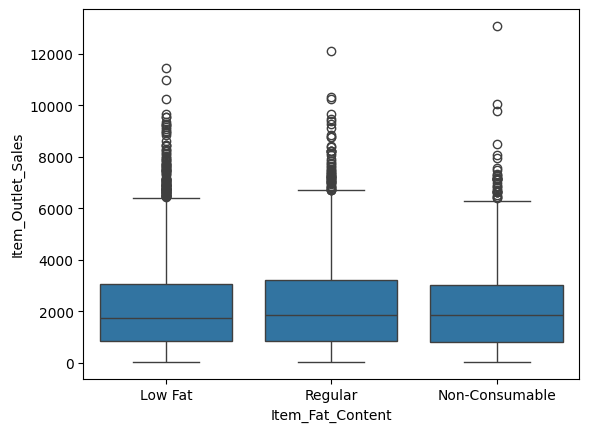

In [141]:
sns.boxplot(x = "Item_Fat_Content", y="Item_Outlet_Sales", data=sales)
plt.show()

In [142]:
# For Item Type

sales["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [143]:
# Creating new labels from existing one

perishables = ['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Starchy Foods', 'Seafood' ]
perishables

['Dairy',
 'Meat',
 'Fruits and Vegetables',
 'Breakfast',
 'Breads',
 'Starchy Foods',
 'Seafood']

In [144]:
def perish(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non-Perishables"

In [145]:
# Applying Function to create new category

sales["Item_Type"] = sales["Item_Type"].apply(perish)

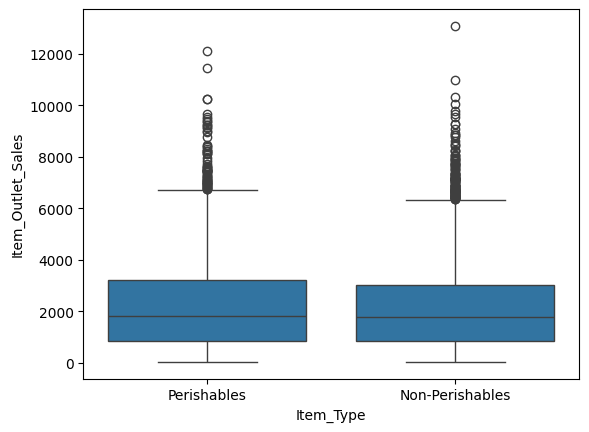

In [146]:
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = sales) 
plt.show()

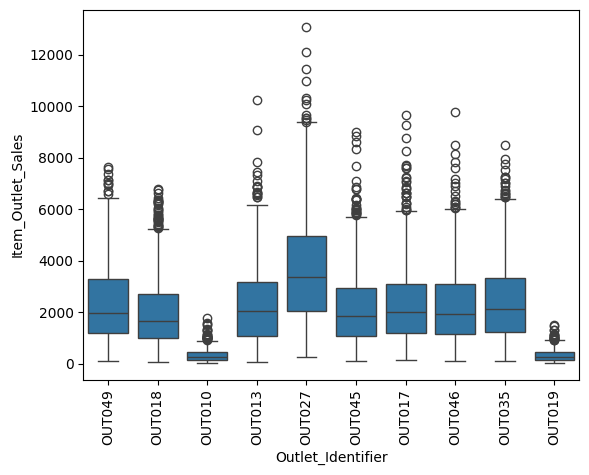

In [147]:
# For Outlet Identifier

sns.boxplot(x="Outlet_Identifier", y = "Item_Outlet_Sales", data=sales)
plt.xticks(rotation = 90)
plt.show()

In [148]:
sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()*100  # analysis

Outlet_Identifier
OUT010     33935.166198
OUT013    229899.525558
OUT017    234067.526350
OUT018    199549.873922
OUT019     34032.972273
OUT027    369403.855765
OUT035    243884.186602
OUT045    219238.479763
OUT046    227784.426688
OUT049    234835.463462
Name: Item_Outlet_Sales, dtype: float64

In [149]:
a = sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().idxmax()  # analysis
b = sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().max()*100  # analysis
print(a,"=",b)

OUT027 = 369403.85576470586


In [150]:
part = [b//3]*3
part

[np.float64(123134.0), np.float64(123134.0), np.float64(123134.0)]

In [151]:
x = (sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()*100) < 120000 # Getting Outlets with Low Sales
Low = x[x].index.tolist()
Low

['OUT010', 'OUT019']

In [152]:
x = (sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()*100).between(120000,240000) # Getting Outlets with Medium Sales 
x[x]

Outlet_Identifier
OUT013    True
OUT017    True
OUT018    True
OUT045    True
OUT046    True
OUT049    True
Name: Item_Outlet_Sales, dtype: bool

In [153]:
x = (sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()*100) > 240000 # Getting Outlets with High Sales
High = x[x].index.tolist()
High

['OUT027', 'OUT035']

In [154]:
def out_id(x):  # Using Previously Defined lists ( High, Low )
    if x in High:      
        return "High"
    if x in Low:
        return "Low"
    else:
        return "Medium"

In [155]:
sales["Outlet_Identifier"] = sales["Outlet_Identifier"].apply(out_id)  # Using Function to seggregate the Outlet on Basis of sales

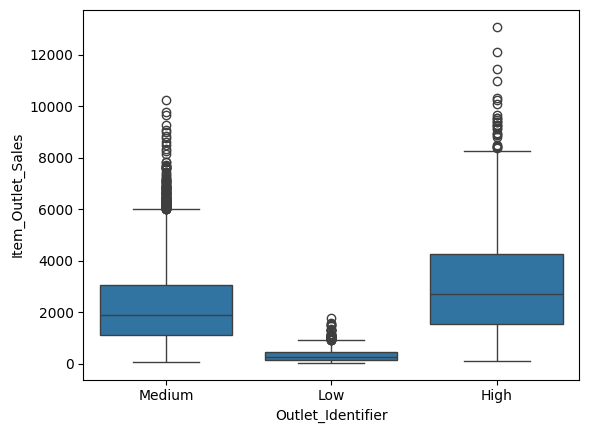

In [156]:
sns.boxplot(x="Outlet_Identifier", y = "Item_Outlet_Sales", data=sales)
plt.show()

In [157]:
sales["Outlet_Location_Type"].unique()

array(['Tier 2', 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [158]:
# Replacing Unnecessary Values

sales["Outlet_Location_Type"].replace(to_replace= ['nan', '  --', 'na', '  -', '?', 'NAN' ],
                                      value=["Missing"]*6, inplace=True)

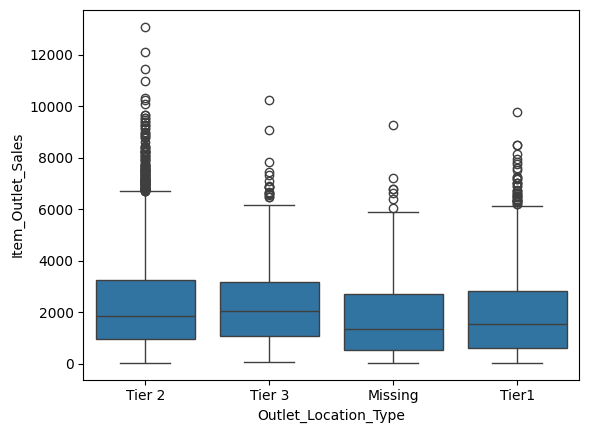

In [159]:
sns.boxplot( x = "Outlet_Location_Type", y = "Item_Outlet_Sales",data= sales) 
plt.show()

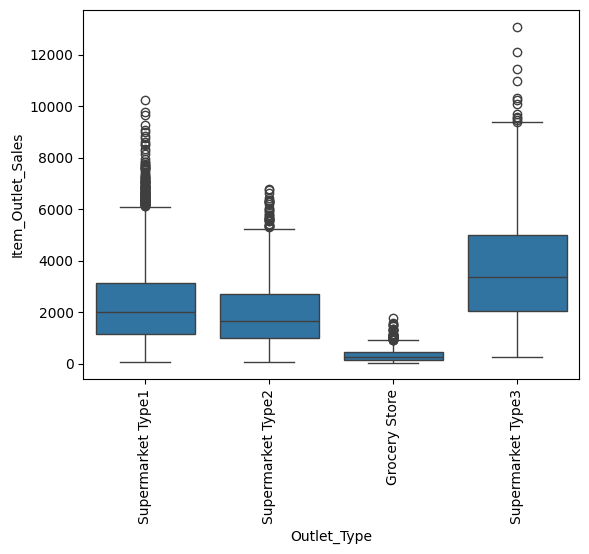

In [160]:
sns.boxplot( x = "Outlet_Type", y = "Item_Outlet_Sales",data= sales)
plt.xticks(rotation = 90)
plt.show()

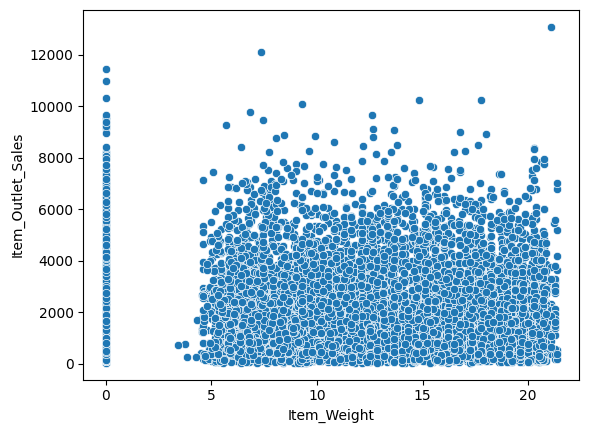

In [161]:
# Visualize

sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales", data=sales)
plt.show()

In [162]:
# Correcting incorrect values

wgt = np.round(sales.groupby("Item_Identifier")["Item_Weight"].mean(),2).to_dict()

In [163]:
sales["Item_Weight"] = sales["Item_Identifier"].map(wgt)  # Mapping correct values

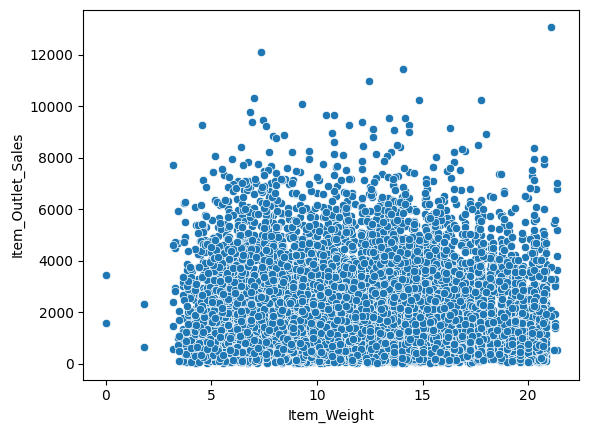

In [164]:
sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales", data=sales)
plt.show()

In [165]:
# Rechecking for incorrect values

sales.loc[sales["Item_Weight"] == 0]  

Item_Identifier Item_Codes  Item_Weight Item_Fat_Content  \
927            FDN52         FD          0.0          Regular   
4187           FDE52         FD          0.0          Regular   

      Item_Visibility        Item_Type  Item_MRP Outlet_Identifier  \
927          0.130933  Non-Perishables      86.9              High   
4187         0.029742      Perishables      89.0              High   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
927                        1985      Medium               Tier 2   
4187                       1985      Medium               Tier 2   

            Outlet_Type  Item_Outlet_Sales  Profit  
927   Supermarket Type3          1569.9564    14.1  
4187  Supermarket Type3          3453.5046    13.9

In [166]:
# Imputing values

val4 = sales.loc[(sales["Item_Fat_Content"] == "Regular") & (sales["Item_Codes"] == "FD"), "Item_Weight"].mean()
val4
sales.loc[(sales["Item_Identifier"] == "FDN52"), "Item_Weight"] = np.round(val4,2)

In [167]:
# Dropping the other one ( we can also impute the value )

sales = sales.drop(sales[sales["Item_Identifier"] == "FDE52"].index)

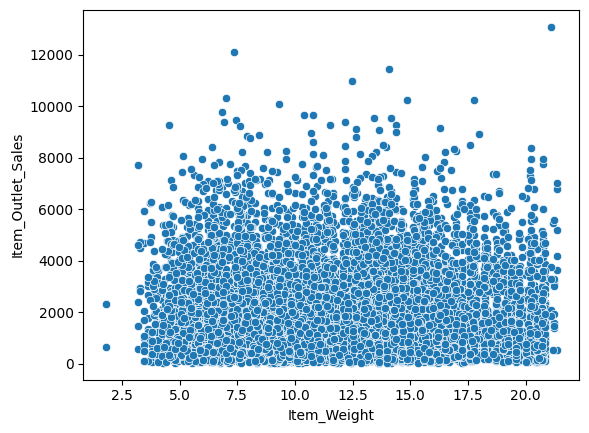

In [168]:
sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales", data=sales)
plt.show()


##### Findings
* Creating New Labels .
    - From Item Identifiers, extracting first characters and putting them in **Item Codes** to categorize items into broader groups.
    - Correcting **Item Fat Content labels** as *Low Fat* and *Regular* as they contact similar labels with different names.
    - For non edible items, we used **Item Code - NC** to put them in different label known as **Non - consumable** inside **Item Fat Content**.
    - For **Item Type**, created a function to segregate all the items under two labels, *Perishables* and *Non - Perishables* from a predefined list of all **Item Type**.
    - For **Outlet Identifier**, created a function to segregate all the *outlets* under three labels, *Low*, *Medium* and *High* according to *sales*.
    - For **Outlet Location Type**, we found the irregular values like *nan,?, etc.* under a single label named *Missing*.
    - Didn't find anything irregular in **Outlet Type**.
* Correcting incorrect values
    - As discovered earlier, **Item Weight** contains *items* having *weights = zero*.
    - To correct incorrect values, we are grouping the **Item Weights** with **Item Identifiers** and saving their *mean* inside a *dictationary* and then *mapping* the values in **Item Weight** Column.
    - Checking for remaining incorrect values and manually imputing the values there and can also drop them.


### Outliers Treatment

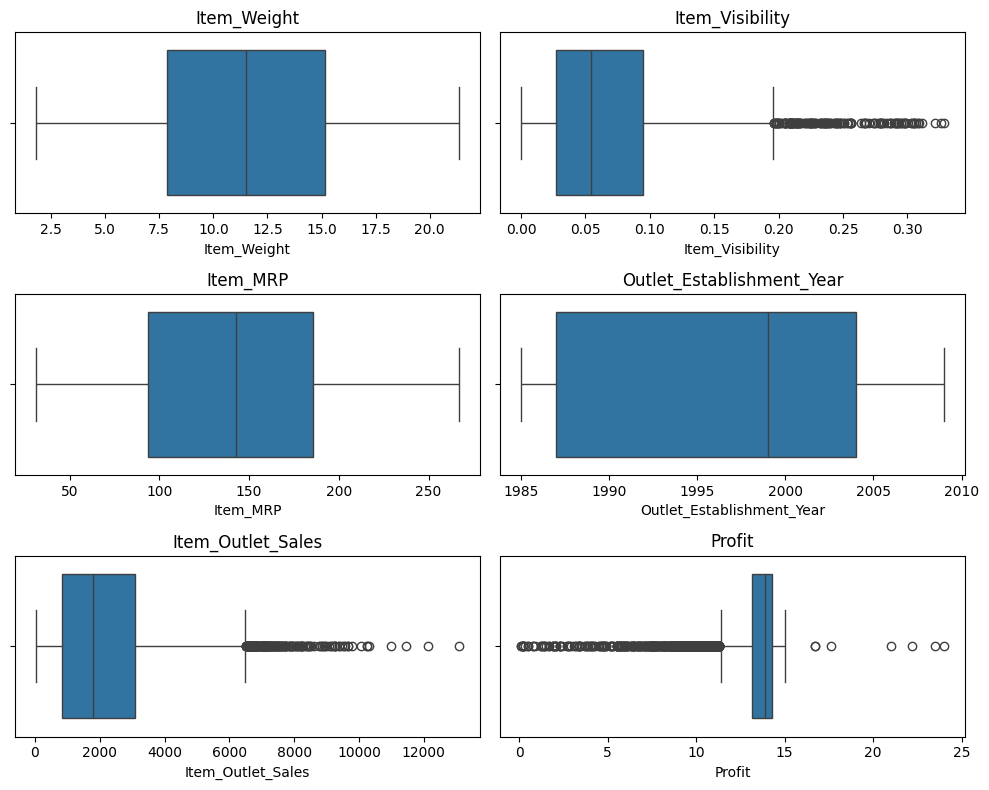

In [169]:
# Visualization

plt.figure(figsize=(10,8))
c=1

for i in num_cols:
    plt.subplot(3,2,c)
    sns.boxplot(x = sales[i], data = sales)
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()


In [170]:
# Capping Outliers

'''

ll,ul = np.percentile(sales["Item_Visibility"],[10,95])
sales.loc[sales["Item_Visibility"]>ul, "Item_Visibility"]=ul
sales.loc[sales["Item_Visibility"]<ll,"Item_Visibility"]=ll

'''

# for item visibility
# commenting just to prevent re application

In [171]:
# Outlier Trement for Profit

'''

from scipy.stats.mstats import winsorize

sales["Profit"] = winsorize(sales["Profit"], limits=[0.10, 0.10])  # Caps lowest & highest 10%

'''

# using winsorize but can also use quantile one

'''

lb, ub  = sales["Profit"].quantile([0.05,0.95])
sales["Profit_2"] = sales["Profit"].clip(lower = lb, upper = ub)

'''

# commenting just to prevent re application

'\n\nlb, ub  = sales["Profit"].quantile([0.05,0.95])\nsales["Profit_2"] = sales["Profit"].clip(lower = lb, upper = ub)\n\n'

In [172]:
# Importing Yeo - Johnson

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [173]:
# Outlier Treatment for sales 

sales["Item_Outlet_Sales"] = pt.fit_transform(sales[["Item_Outlet_Sales"]])  

In [174]:
# Checking for remaining one

q1 = sales["Item_Outlet_Sales"].quantile(0.25)
q3 = sales["Item_Outlet_Sales"].quantile(0.75)
iqr = q3 - q1

outliers = sales[(sales["Item_Outlet_Sales"] < q1 - 1.5*iqr) | (sales["Item_Outlet_Sales"] > q3 + 1.5*iqr)]
outliers

Item_Identifier Item_Codes  Item_Weight Item_Fat_Content  \
1450           FDZ20         FD        14.09          Low Fat   
4349           FDP33         FD        12.47          Low Fat   
5223           FDQ19         FD         7.35          Regular   
7188           NCE42         NC        21.10   Non-Consumable   

      Item_Visibility        Item_Type  Item_MRP Outlet_Identifier  \
1450         0.012039      Perishables     253.0              High   
4349         0.088840  Non-Perishables     254.3              High   
5223         0.014296      Perishables     242.7              High   
7188         0.012039  Non-Perishables     235.0              High   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1450                       1985      Medium               Tier 2   
4349                       1985      Medium               Tier 2   
5223                       1985      Medium               Tier 2   
7188                       1985      Medium               Tier 2   

            Outlet_Type  Item_Outlet_Sales  Profit  
1450  Supermarket Type3           2.983827    13.9  
4349  Supermarket Type3           2.897803    12.8  
5223  Supermarket Type3           3.107952    14.3  
7188  Supermarket Type3           3.279195    14.3

In [175]:
# Removing Them

sales = sales[~sales.index.isin(outliers.index)]

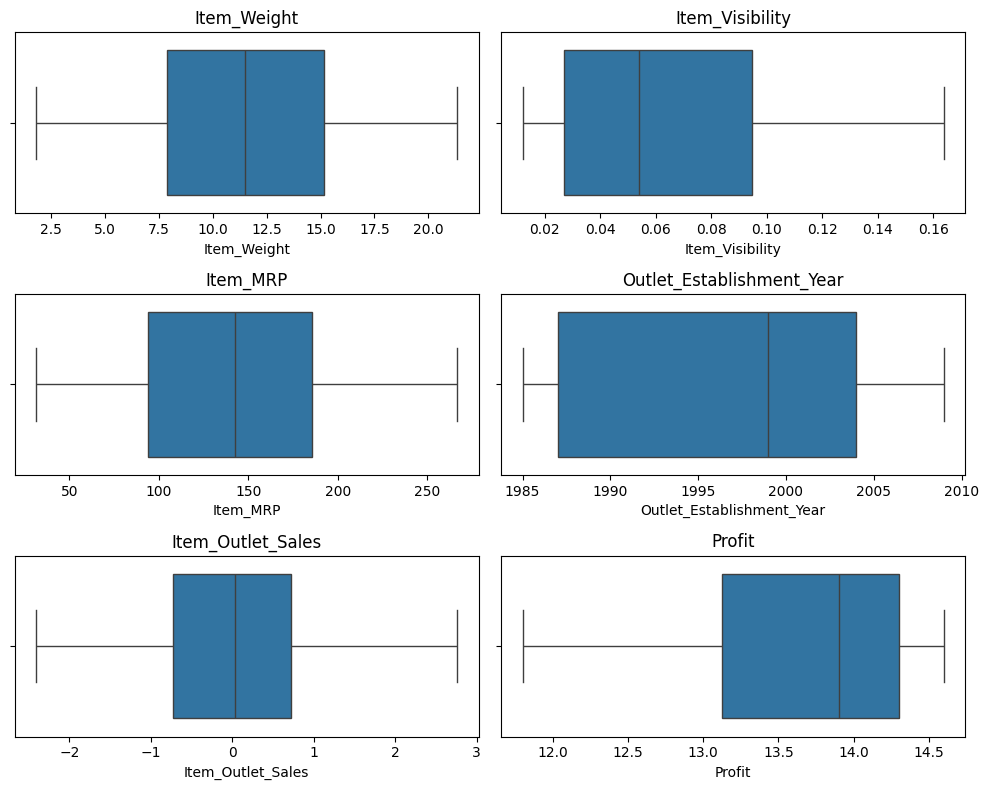

In [176]:
# Rechecking

plt.figure(figsize=(10,8))
c=1

for i in num_cols:
    plt.subplot(3,2,c)
    sns.boxplot(x = sales[i], data = sales)
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

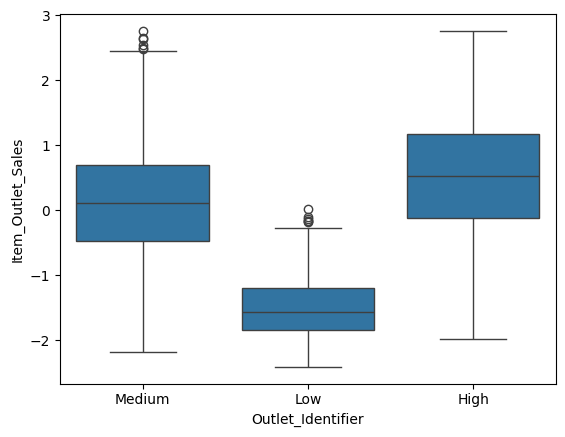

In [177]:
sns.boxplot(x="Outlet_Identifier", y = "Item_Outlet_Sales", data=sales)
plt.show()

In [178]:
# Treating for Outlet Identifier

s = sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"]

qq1 = s.transform(lambda x : x.quantile(0.25))
qq3 = s.transform(lambda x : x.quantile(0.75))
iqrr = qq3 - qq1

outlierss = (sales["Item_Outlet_Sales"] < qq1 - 1.5 * iqrr) | (sales["Item_Outlet_Sales"] > qq3 + 1.5 * iqrr)
sales[outlierss]

Item_Identifier Item_Codes  Item_Weight Item_Fat_Content  \
997            FDK28         FD         4.56          Low Fat   
1120           NCX41         NC        15.83   Non-Consumable   
1380           FDJ55         FD        12.80          Regular   
3180           FDV59         FD        13.35          Low Fat   
4289           NCM05         NC         6.82   Non-Consumable   
4888           FDF39         FD        14.85          Regular   
4961           FDK03         FD        10.80          Regular   
6409           FDA21         FD        13.65          Low Fat   
7748           FDY39         FD         3.18          Regular   
7759           NCK30         NC        14.85   Non-Consumable   
8039           FDY55         FD        14.36          Low Fat   
8353           NCX41         NC        15.83   Non-Consumable   

      Item_Visibility        Item_Type  Item_MRP Outlet_Identifier  \
997          0.065961  Non-Perishables     259.3            Medium   
1120         0.012039  Non-Perishables     211.0               Low   
1380         0.039386      Perishables     224.8               Low   
3180         0.080387      Perishables     219.2               Low   
4289         0.059847  Non-Perishables     262.5            Medium   
4888         0.019495      Perishables     261.3            Medium   
4961         0.074339      Perishables     255.5            Medium   
6409         0.035931  Non-Perishables     184.5            Medium   
7748         0.082341      Perishables     185.8               Low   
7759         0.102066  Non-Perishables     254.3               Low   
8039         0.081485      Perishables     258.1            Medium   
8353         0.031024  Non-Perishables     210.5               Low   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
997                        2007      Medium              Missing   
1120                       1998      Medium               Tier 2   
1380                       1998      Medium               Tier 2   
3180                       1998      Medium               Tier 2   
4289                       1997       Small                Tier1   
4888                       1987        High               Tier 3   
4961                       2007      Medium               Tier 2   
6409                       1987        High               Tier 3   
7748                       1985       Small                Tier1   
7759                       1998      Medium               Tier 2   
8039                       2002      Medium               Tier 2   
8353                       1985       Small                Tier1   

            Outlet_Type  Item_Outlet_Sales  Profit  
997   Supermarket Type1           2.547509    11.8  
1120      Grocery Store          -0.171111    13.8  
1380      Grocery Store          -0.105677    14.5  
3180      Grocery Store          -0.141342    13.0  
4289  Supermarket Type1           2.654400    12.7  
4888  Supermarket Type1           2.752235    13.3  
4961  Supermarket Type1           2.630296    14.4  
6409  Supermarket Type1           2.502638    14.0  
7748      Grocery Store          -0.179717    13.6  
7759      Grocery Store           0.026883    14.5  
8039  Supermarket Type1           2.486263    14.5  
8353      Grocery Store          -0.171111    12.9

In [179]:
median_s = sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("median")
# sales.loc[outlierss, "Item_Outlet_Sales"] = median_s
median_s 

# we can treat outliers here but decided not to as it is generally not necessary to treat outliers in category

0       0.106797
1       0.106797
2       0.106797
3      -1.565213
4       0.106797
          ...   
8518    0.106797
8519    0.106797
8520    0.528981
8521    0.106797
8522    0.106797
Name: Item_Outlet_Sales, Length: 8518, dtype: float64

##### Findings
* Plotting boxplots to identify Outliers in numerical columns with target variable.
    - **Item Visibility, Profit** and **Item Outlet Sales** have *Outliers*.
    - Capping the *Outliers* in **Item Visibility** using *10th and 95th Percentile*.
    - Using *Winsorize method* for managing *Outliers* in **Profit** by using the minimum value possible (lowest 10% and highest 10%).
    - Applying *Yeo - Johnson Method* to reduce the effect of *Outliers* in **Item Outlet Sales** as we can't change the values by capping as the data is of *sales*.
    - Detecting the remaining *Outliers* in **Item Outlet Sales** and it comes out to be four only. So we are dropping them.
* Plotting the Boxplots for categorical columns
    - Detected the *Outliers* in **Outlet Identifier**
    - Grouping the **Outlet Identifier** with **Item Outlet Sales** and identifying the potential *Outliers* using *IQR*.
    - Generally, It is not necessary to treat *Outliers* present in *Categorical Columns* and here also we didn't treat them but we can if according to the requirements.

### Skewness Check and Fix

In [180]:
sales.head()

Item_Identifier Item_Codes  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         FD         9.30          Low Fat         0.016047   
1           DRC01         DR         5.92          Regular         0.019278   
2           FDN15         FD        14.58          Low Fat         0.016760   
3           FDX07         FD        19.20          Regular         0.012039   
4           NCD19         NC         8.93   Non-Consumable         0.012039   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0      Perishables     249.8            Medium                       1999   
1  Non-Perishables      48.3            Medium                       2009   
2      Perishables     141.6            Medium                       1999   
3      Perishables     182.1               Low                       1998   
4  Non-Perishables      53.9            Medium                       1987   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0      Medium               Tier 2  Supermarket Type1           0.985159   
1      Medium               Tier 2  Supermarket Type2          -1.218025   
2      Medium               Tier 2  Supermarket Type1           0.220497   
3      Medium               Tier 2      Grocery Store          -0.835046   
4        High               Tier 3  Supermarket Type1          -0.566469   

   Profit  
0    11.8  
1    14.3  
2    14.5  
3    13.6  
4    14.1

In [181]:
sales.drop(columns = ["Item_Identifier"], inplace= True)

In [182]:
sales["Outlet_Establishment_Year"] = sales["Outlet_Establishment_Year"].astype(str)
sales.dtypes

Item_Codes                    object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [183]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [184]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Profit'] # Removing Year
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Profit']

In [185]:
sales[num_cols].skew()

Item_Weight          0.230734
Item_Visibility      0.727716
Item_MRP             0.127473
Item_Outlet_Sales   -0.084629
Profit              -0.903386
dtype: float64

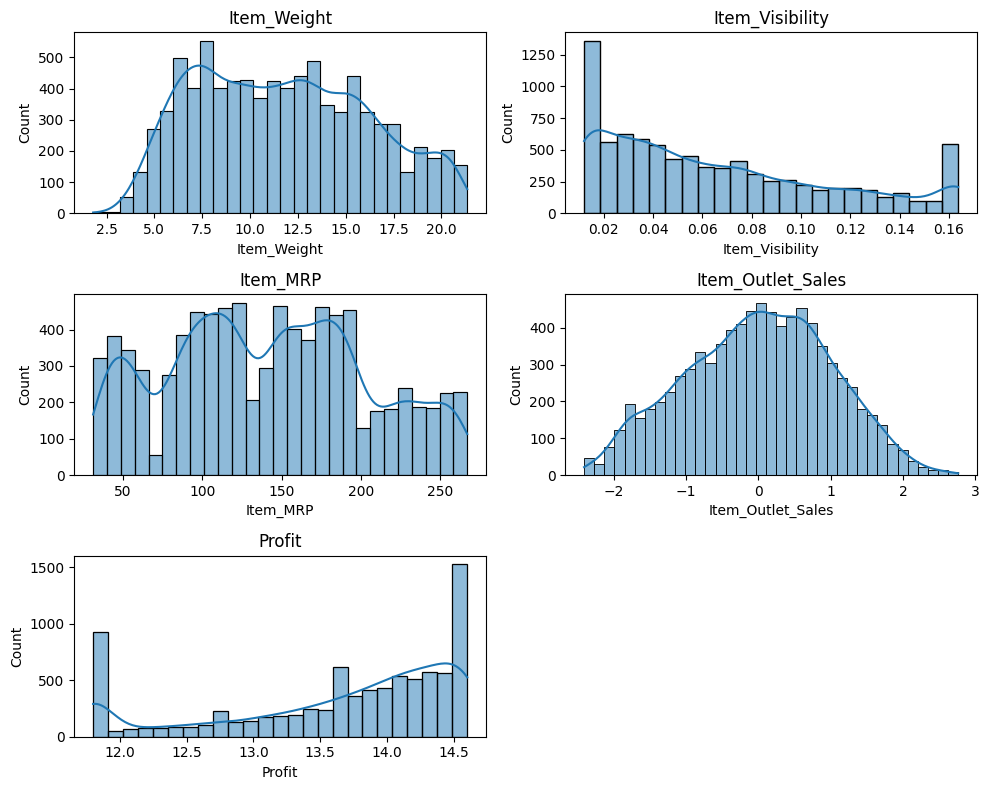

In [186]:
# Plotting to check normality of data

plt.figure(figsize=(10,8))

c = 1
for i in num_cols:
    plt.subplot(3,2,c)
    sns.histplot(x = sales[i], data=sales, kde= True)
    c += 1
    plt.title(i)
plt.tight_layout()
plt.show()

In [187]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']

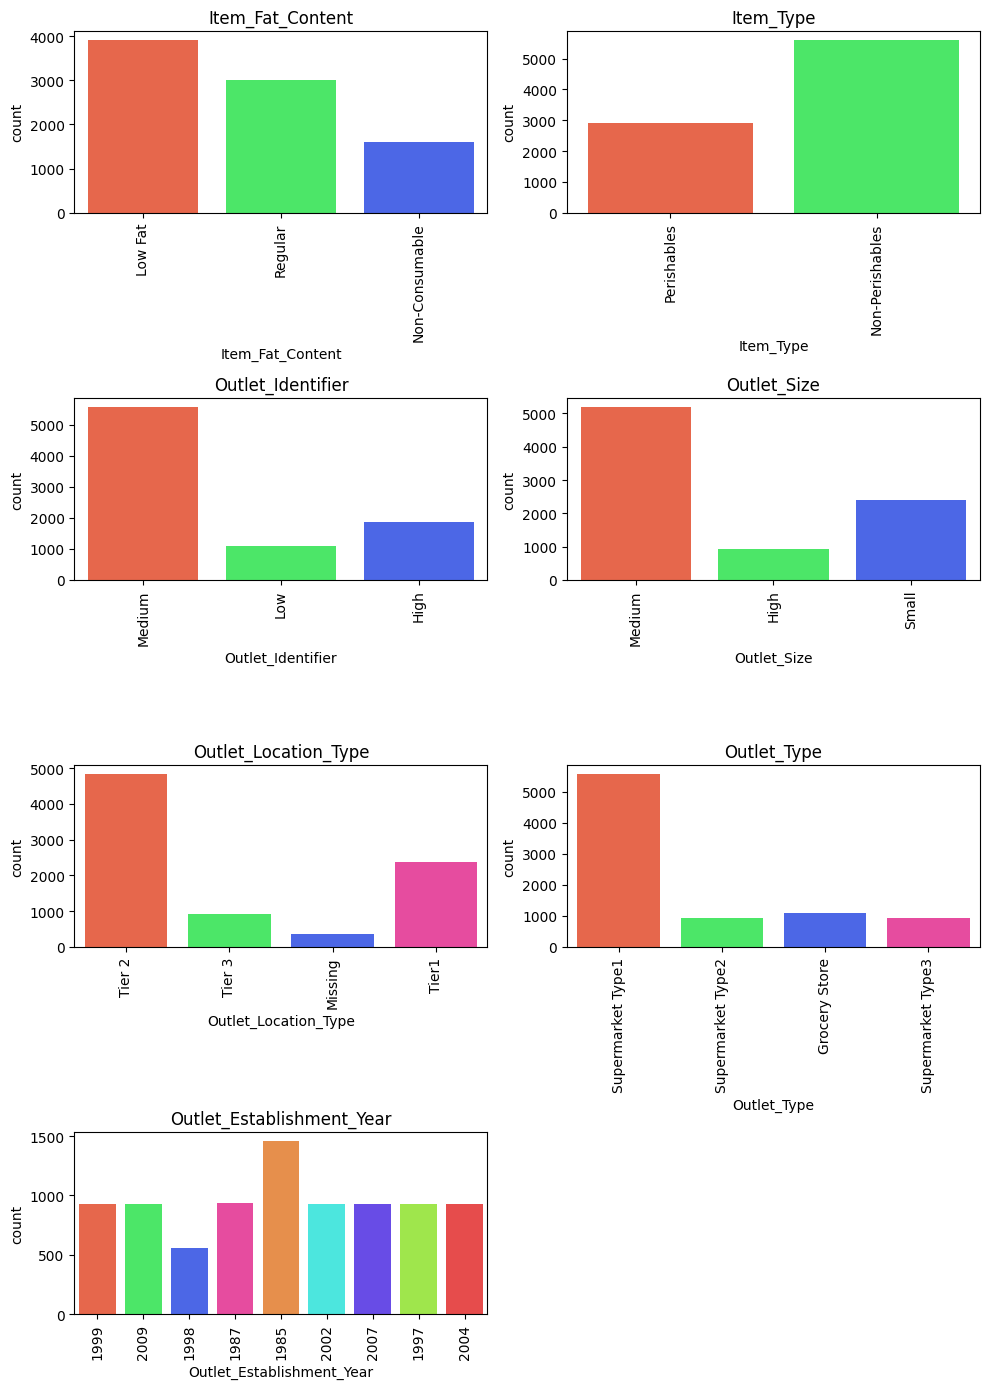

In [188]:
# Plotting Categorical Columns

plt.figure(figsize=(10,14))

c = 1
for i in cat_cols:
    plt.subplot(4,2,c)
    sns.countplot(x = sales[i], data = sales, palette=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', 
                                                       '#FF8C33', '#33FFF5', '#5733FF', '#A1FF33', '#FF3333', '#33A1FF'])
    c += 1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Findings
* Preparing Data.
    - Dropping the unnecesary **Item Identifier** Column.
    - Changing the *data type* of **Outlet Establishment Year** from *Numeric* to *Category*.
    - Checking the *skewness* of data and found that no column is *skewed*.
    - Plotting the *Numerical columns* again to check the *Normality of data*.
    - Plotting the *Categorical columns* again to check the *frequency distribution* and other aspects like *labels etc.*

# Extra Experimental Part

### Scaling

In [189]:
from scipy.stats import stats

In [190]:
zs = pd.DataFrame(stats.zscore(sales[num_cols]))
zs

0         1         2         3         4
0    -0.547899 -1.080702  1.749120  0.988558 -2.065117
1    -1.307145 -1.009716 -1.488965 -1.219000  0.747428
2     0.638143 -1.065042  0.010357  0.222378  0.972431
3     1.675930 -1.168765  0.661188 -0.835261 -0.040085
4    -0.631011 -1.168765 -1.398974 -0.566151  0.522424
...        ...       ...       ...       ...       ...
8513 -1.095994 -0.185700  1.181853  0.576645  0.522424
8514 -0.754558 -0.401035 -0.526378 -1.063398  0.634926
8515 -0.255881 -0.660205 -0.897593 -0.392232 -2.065117
8516 -1.017374  1.757330 -0.608334  0.072395  0.634926
8517 -0.143566 -0.447264 -1.051864 -0.797936  1.084933

[8518 rows x 5 columns]

In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

In [192]:
scaled_sc = pd.DataFrame(sc.fit_transform(sales[num_cols]), columns=num_cols)
scaled_sc

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales    Profit
0       -0.547899        -1.080702  1.749120           0.988558 -2.065117
1       -1.307145        -1.009716 -1.488965          -1.219000  0.747428
2        0.638143        -1.065042  0.010357           0.222378  0.972431
3        1.675930        -1.168765  0.661188          -0.835261 -0.040085
4       -0.631011        -1.168765 -1.398974          -0.566151  0.522424
...           ...              ...       ...                ...       ...
8513    -1.095994        -0.185700  1.181853           0.576645  0.522424
8514    -0.754558        -0.401035 -0.526378          -1.063398  0.634926
8515    -0.255881        -0.660205 -0.897593          -0.392232 -2.065117
8516    -1.017374         1.757330 -0.608334           0.072395  0.634926
8517    -0.143566        -0.447264 -1.051864          -0.797936  1.084933

[8518 rows x 5 columns]

In [193]:
scaled_mm = pd.DataFrame(mm.fit_transform(sales[num_cols]), columns=num_cols)
scaled_mm

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales    Profit
0        0.383632         0.026413  0.927419           0.656298  0.000000
1        0.210742         0.047703  0.072156           0.230200  0.892857
2        0.653708         0.031109  0.468166           0.508411  0.964286
3        0.890026         0.000000  0.640068           0.304268  0.642857
4        0.364706         0.000000  0.095925           0.356211  0.821429
...           ...              ...       ...                ...       ...
8513     0.258824         0.294848  0.777589           0.576791  0.821429
8514     0.336573         0.230264  0.326401           0.260234  0.857143
8515     0.450128         0.152531  0.228353           0.389781  0.000000
8516     0.276726         0.877617  0.304754           0.479462  0.857143
8517     0.475703         0.216398  0.187606           0.311473  1.000000

[8518 rows x 5 columns]

In [194]:
scaled_rs = pd.DataFrame(rs.fit_transform(sales[num_cols]), columns=num_cols)
scaled_rs

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales    Profit
0       -0.300958        -0.560438  1.167756           0.654229 -1.787234
1       -0.763338        -0.512659 -1.027233          -0.868707  0.340426
2        0.421341        -0.549898 -0.010893           0.125662  0.510638
3        1.053352        -0.619712  0.430283          -0.603975 -0.255319
4       -0.351573        -0.619712 -0.966231          -0.418324  0.170213
...           ...              ...       ...                ...       ...
8513    -0.634747         0.041975  0.783224           0.370061  0.170213
8514    -0.426813        -0.102964 -0.374728          -0.761361  0.255319
8515    -0.123119        -0.277408 -0.626362          -0.298341 -1.787234
8516    -0.586867         1.349802 -0.430283           0.022193  0.255319
8517    -0.054720        -0.134080 -0.730937          -0.578226  0.595745

[8518 rows x 5 columns]

### Encoding


In [195]:
# Dummy 

pd.get_dummies(sales[cat_cols])

Item_Fat_Content_Low Fat  Item_Fat_Content_Non-Consumable  \
0                         True                            False   
1                        False                            False   
2                         True                            False   
3                        False                            False   
4                        False                             True   
...                        ...                              ...   
8518                      True                            False   
8519                     False                            False   
8520                     False                             True   
8521                     False                            False   
8522                      True                            False   

      Item_Fat_Content_Regular  Item_Type_Non-Perishables  \
0                        False                      False   
1                         True                       True   
2                        False                      False   
3                         True                      False   
4                        False                       True   
...                        ...                        ...   
8518                     False                       True   
8519                      True                       True   
8520                     False                       True   
8521                      True                       True   
8522                     False                       True   

      Item_Type_Perishables  Outlet_Identifier_High  Outlet_Identifier_Low  \
0                      True                   False                  False   
1                     False                   False                  False   
2                      True                   False                  False   
3                      True                   False                   True   
4                     False                   False                  False   
...                     ...                     ...                    ...   
8518                  False                   False                  False   
8519                  False                   False                  False   
8520                  False                    True                  False   
8521                  False                   False                  False   
8522                  False                   False                  False   

      Outlet_Identifier_Medium  Outlet_Size_High  Outlet_Size_Medium  ...  \
0                         True             False                True  ...   
1                         True             False                True  ...   
2                         True             False                True  ...   
3                        False             False                True  ...   
4                         True              True               False  ...   
...                        ...               ...                 ...  ...   
8518                      True              True               False  ...   
8519                      True             False                True  ...   
8520                     False             False               False  ...   
8521                      True             False                True  ...   
8522                      True             False               False  ...   

      Outlet_Type_Supermarket Type3  Outlet_Establishment_Year_1985  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
...                             ...                             ...   
8518                          False                           False   
8519                          False   

In [196]:
# One Hot (n-1)

pd.get_dummies(sales[cat_cols], drop_first=True)

Item_Fat_Content_Non-Consumable  Item_Fat_Content_Regular  \
0                               False                     False   
1                               False                      True   
2                               False                     False   
3                               False                      True   
4                                True                     False   
...                               ...                       ...   
8518                            False                     False   
8519                            False                      True   
8520                             True                     False   
8521                            False                      True   
8522                            False                     False   

      Item_Type_Perishables  Outlet_Identifier_Low  Outlet_Identifier_Medium  \
0                      True                  False                      True   
1                     False                  False                      True   
2                      True                  False                      True   
3                      True                   True                     False   
4                     False                  False                      True   
...                     ...                    ...                       ...   
8518                  False                  False                      True   
8519                  False                  False                      True   
8520                  False                  False                     False   
8521                  False                  False                      True   
8522                  False                  False                      True   

      Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0                   True              False                         True   
1                   True              False                         True   
2                   True              False                         True   
3                   True              False                         True   
4                  False              False                        False   
...                  ...                ...                          ...   
8518               False              False                        False   
8519                True              False                         True   
8520               False               True                        False   
8521                True              False                         True   
8522               False               True                        False   

      Outlet_Location_Type_Tier 3  Outlet_Location_Type_Tier1  ...  \
0                           False                       False  ...   
1                           False                       False  ...   
2                           False                       False  ...   
3                           False                       False  ...   
4                            True                       False  ...   
...                           ...                         ...  ...   
8518                         True                       False  ...   
8519                        False                       False  ...   
8520                        False                        True  ...   
8521                        False                       False  ...   
8522                        False                        True  ...   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                             False                          False   
1                              True                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   
...                             ...                            ...

### Splitting the data


In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x = sales.drop("Item_Outlet_Sales", axis=1)
y = sales["Item_Outlet_Sales"]

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=0)

In [200]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6814, 12), (1704, 12), (6814,), (1704,))

### Findings
* Just tried the ML methods like :
    - Scaling using methods like *Zscore*, *Standard Scalar*, *MinMax Scaler* and *Robust Scalar*.
    - Encoded the data using methods like *Dummy Encoding*, *One - Hot Encoding*.
    - Splitting the data into *Train* and *Test* parts.